## Exploratory Data Analysis

### Import

In [1]:
import pandas as pd
import pandas as pd
import altair as alt
from sklearn.model_selection import train_test_split
import warnings

# ignore warning
warnings.filterwarnings('ignore')

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

### Read raw data set

In [2]:
# skip the first row, and make id column as index
credit_df = pd.read_excel("../data/raw/credit_default_data.xlsx", index_col=0, skiprows=1)

# change a column name
credit_df = credit_df.rename(columns={'default payment next month': 'default_payment_next_month'})

# change target data type
credit_df["default_payment_next_month"] = credit_df["default_payment_next_month"].astype("category")

### Summary of the data set

The goal of the project is to predict weather a person is going to default on credit card by some feature provided to us. There are 30,000 observations in the data set and 23 features in the data set and a target. There are in total 24 columns. There are no missing values in the data set. The target in the data is whether the client make a default payment next month.

### The data

In [3]:
credit_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


### Table 1 information table

There is no missing value in our data set, and there is 30000 observations for each row.

In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   LIMIT_BAL                   30000 non-null  int64   
 1   SEX                         30000 non-null  int64   
 2   EDUCATION                   30000 non-null  int64   
 3   MARRIAGE                    30000 non-null  int64   
 4   AGE                         30000 non-null  int64   
 5   PAY_0                       30000 non-null  int64   
 6   PAY_2                       30000 non-null  int64   
 7   PAY_3                       30000 non-null  int64   
 8   PAY_4                       30000 non-null  int64   
 9   PAY_5                       30000 non-null  int64   
 10  PAY_6                       30000 non-null  int64   
 11  BILL_AMT1                   30000 non-null  int64   
 12  BILL_AMT2                   30000 non-null  int64   
 13  BILL_AMT3       

### Table 2 describe table

The scale of our numeric features are vary. For example, 'LIMIT_BAL' has mean of 167484 and standard diviation of 129747. Additionally, for feature 'AGE', the mean is 35.485500 and standard diviation is 9.217904. Therefore, we may need to change there scale when we are doing the model training.

In [5]:
credit_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


### Splitting data

To carry out the EDA, we split the data in to 20% test set and 80% train set. Additionally, we are using random_state=522 to keep the results consist.

In [6]:
train_df, test_df = train_test_split(credit_df, test_size=0.2, random_state=522)

In [7]:
train_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
ID,,,,,,,,,,,,,,,,,,,,,
23638,200000,2,2,2,46,0,0,0,0,0,...,136629,139504,142269,4342,4593,14955,5143,5166,5349,0
17170,50000,2,3,2,26,0,0,0,0,0,...,26999,27748,28351,1700,2000,3000,1500,1200,1136,0
15956,210000,2,1,2,30,0,0,0,0,0,...,5125,5732,9297,2000,2500,2000,1000,4000,4000,0
21487,90000,2,1,2,27,0,0,2,0,0,...,50611,52764,55898,4000,0,3000,3000,4000,2043,0
12212,60000,1,2,1,40,0,0,0,0,0,...,22564,24191,25778,1500,1500,2000,2000,2000,2000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4427,110000,2,2,1,28,0,0,0,0,0,...,45579,46843,48062,2027,2500,2000,2000,2000,1600,0
12696,20000,2,3,2,38,-1,-1,2,0,-1,...,3668,3508,5278,5015,0,0,3508,5278,780,0
3361,150000,2,2,1,42,0,0,0,0,0,...,138016,144084,136604,6022,5022,5100,10500,0,10000,0


In [8]:
test_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
ID,,,,,,,,,,,,,,,,,,,,,
8517,50000,2,2,2,26,0,0,0,0,0,...,29295,29902,30683,1749,1479,1049,1080,1280,1330,0
24850,310000,1,1,2,32,-2,-2,-2,-2,-2,...,8639,12862,4553,32617,17417,8702,12926,4575,1990,0
6846,130000,2,2,2,34,0,0,0,0,2,...,107525,104042,100190,4050,5600,7800,0,3900,3100,1
26003,280000,2,2,2,46,0,0,2,2,0,...,47851,49374,50198,126000,3000,0,3000,2000,2000,0
16736,50000,1,2,1,30,0,0,0,0,0,...,49526,19686,19374,12000,13000,5000,4010,6000,3000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18181,360000,1,1,1,37,-2,-2,-2,-2,-2,...,4941,2666,588,8187,1571,4965,2679,590,529,0
13767,90000,1,2,1,48,0,0,0,0,0,...,50346,48745,46842,2919,3005,1700,1722,1414,1061,0
18694,50000,2,1,2,25,0,0,0,0,0,...,37401,37177,37446,1900,2000,2000,2000,1000,1500,0


### Table 3 Target count table

As shown in the table below, The target (default payment next month) is an imbalanced feature. There are more cases of not default than default. We may need to apply class-weight or other method to solve the problem.

In [9]:
Target_df = pd.DataFrame(credit_df['default_payment_next_month'].value_counts())
Target_df

,default_payment_next_month
0,23364
1,6636


### Comparing the numeric features in the two classes

As shown below, for each feature there is no overlap between the  two target classes (this may due to the imbalance class distribution). However, we can clearly see that both class have a approximately the same shape. For example, the distribution of 'AGE' for both classes is right skewed. Moreover, in fact most of our numeric features are right skewed. We may need to consider that when fit the model.

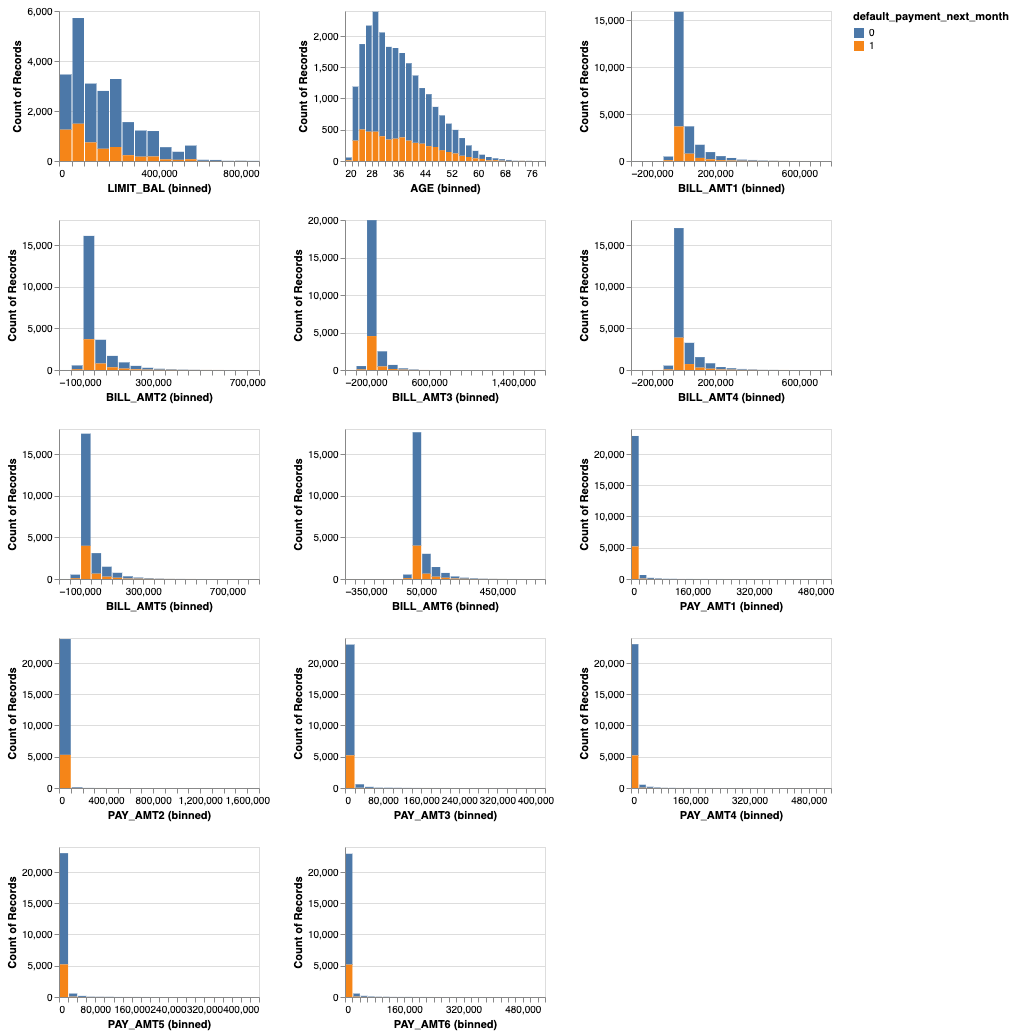

In [10]:
num_cols = ["LIMIT_BAL", "AGE", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", 
            "BILL_AMT5", "BILL_AMT6", "PAY_AMT1",  "PAY_AMT2",  "PAY_AMT3", 
            "PAY_AMT4","PAY_AMT5", "PAY_AMT6"]

alt.Chart(train_df).mark_bar().encode(
     alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=30)),
     y='count()',
     color='default_payment_next_month'
).properties(
    width=200,
    height=150
).repeat(
    num_cols,
    columns=3
)

### Comparing the categorical and ordinal features in the two classes

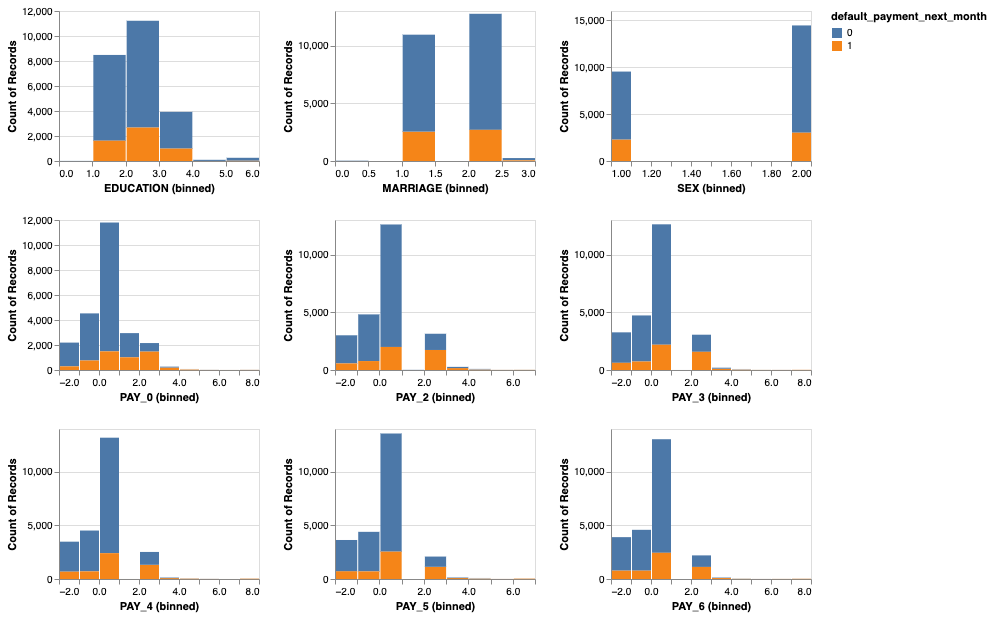

In [11]:
cat_col = ["EDUCATION", "MARRIAGE", "SEX", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]

alt.Chart(train_df).mark_bar().encode(
     alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=10)),
     y='count()',
     color='default_payment_next_month'
).properties(
    width=200,
    height=150
).repeat(
    cat_col,
    columns=3
)

#### Correlation matrix

By the correlation matrix, we can see that the 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', and 'PAY_6' have a quite high correlation with each other. In addition, 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', and 'BILL_AMT6' have the same issue. We may need to consider about those features when training the model. Additionally, for these features have strong correlation, we may need to consider drop one of the pairs. For example, 'BILL_AMT1' and 'BILL_AMT2' have a correlation of 0.95, which is quite high.

In [12]:
train_df.corr().style.background_gradient(cmap='coolwarm')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.026703,-0.224267,-0.110793,0.146987,-0.271492,-0.295653,-0.286325,-0.265120,-0.245308,-0.230197,0.287487,0.280482,0.286677,0.294655,0.297607,0.292017,0.202566,0.189977,0.221036,0.211881,0.222469,0.219683
SEX,0.026703,1.000000,0.018203,-0.031682,-0.093077,-0.061134,-0.077223,-0.070607,-0.063879,-0.058037,-0.048993,-0.037369,-0.034170,-0.026779,-0.021037,-0.017664,-0.017179,-0.001375,-0.004975,-0.007813,-0.010705,0.001302,-0.001565
EDUCATION,-0.224267,0.018203,1.000000,-0.139540,0.172328,0.109730,0.125583,0.117717,0.112848,0.100991,0.081100,0.023121,0.019275,0.012958,0.001298,-0.008105,-0.010312,-0.036739,-0.034226,-0.041364,-0.041222,-0.042014,-0.034281
MARRIAGE,-0.110793,-0.031682,-0.139540,1.000000,-0.415429,0.021287,0.030453,0.038440,0.034349,0.038919,0.036892,-0.023035,-0.021265,-0.026761,-0.025066,-0.025009,-0.021008,-0.010912,-0.016924,-0.005655,-0.015331,-0.002800,-0.005081
AGE,0.146987,-0.093077,0.172328,-0.415429,1.000000,-0.047891,-0.058767,-0.058497,-0.055590,-0.059398,-0.051571,0.059328,0.056321,0.056034,0.053853,0.049244,0.046487,0.026903,0.024536,0.034996,0.020398,0.021190,0.018589
PAY_0,-0.271492,-0.061134,0.109730,0.021287,-0.047891,1.000000,0.673592,0.575014,0.539145,0.507117,0.473542,0.188293,0.190831,0.179512,0.181225,0.182726,0.178559,-0.079996,-0.074790,-0.078174,-0.063545,-0.055943,-0.054563
PAY_2,-0.295653,-0.077223,0.125583,0.030453,-0.058767,0.673592,1.000000,0.765831,0.661323,0.621381,0.572819,0.235939,0.234788,0.221624,0.222261,0.221729,0.218873,-0.084066,-0.064179,-0.062402,-0.046061,-0.038090,-0.035325
PAY_3,-0.286325,-0.070607,0.117717,0.038440,-0.058497,0.575014,0.765831,1.000000,0.778398,0.685458,0.630668,0.207163,0.235205,0.225322,0.226594,0.224605,0.221466,0.002115,-0.067735,-0.058188,-0.047188,-0.034524,-0.035571
PAY_4,-0.265120,-0.063879,0.112848,0.034349,-0.055590,0.539145,0.661323,0.778398,1.000000,0.820253,0.717386,0.202297,0.224449,0.243835,0.246070,0.243069,0.239423,-0.008802,0.001199,-0.075148,-0.045007,-0.033145,-0.027108
PAY_5,-0.245308,-0.058037,0.100991,0.038919,-0.059398,0.507117,0.621381,0.685458,0.820253,1.000000,0.816562,0.205276,0.224477,0.242075,0.270646,0.269018,0.262262,-0.005540,-0.000101,0.008157,-0.058193,-0.030940,-0.024625
